### Import required modules

In [36]:
import matplotlib.pyplot as plt
import sys
sys.path.append('../porousmedialab')
from BatchLab import BatchLab
import numpy as np
%matplotlib inline

### Initiate the model

In [37]:
bl = BatchLab(tend = 30, dt = 0.1)

### Add titrand in the model

In [38]:
C_init=0.1/4
bl.add_species(element='H3PO4', init_C=C_init)
bl.add_species(element='H2PO4', init_C=C_init)
bl.add_species(element='HPO4', init_C=C_init)
bl.add_species(element='PO4', init_C=C_init)

bl.add_acid(species=['H3PO4', 'H2PO4', 'HPO4', 'PO4'], pKa=[2.148, 7.198, 12.375])

### Add Titrant: $Na^+$

In [39]:
bl.add_species(element='Na', init_C=0)
bl.add_ion(element='Na', charge=1)

### Slowly increase the concetration of titrant

In [40]:
bl.dcdt['Na'] = '1e-2'  # units of mass per units of time

### Solve

In [41]:
bl.solve()

Simulation started:
	 2017-09-15 10:12:29


Estimated time of the code execution:
	 0h:00m:01s
Will finish approx.:
	 2017-09-15 10:12:31


/Users/MarkelovIgor/anaconda/lib/python3.5/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


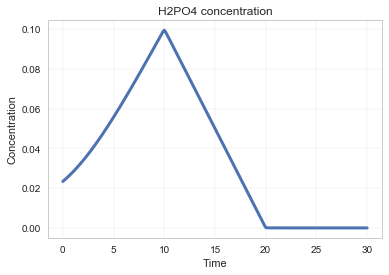

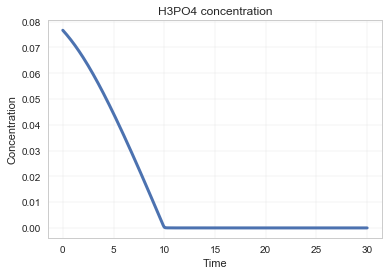

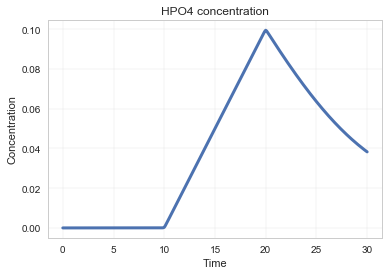

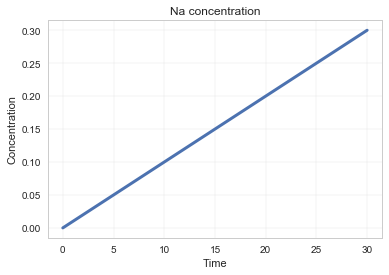

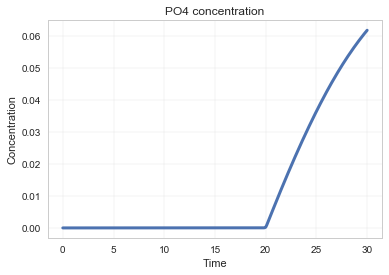

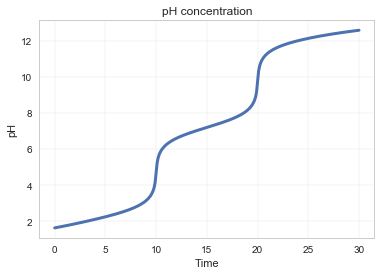

In [42]:
bl.plot_profiles()

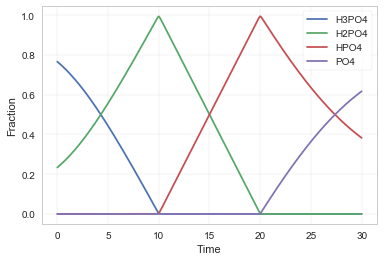

In [43]:
bl.plot_fractions()

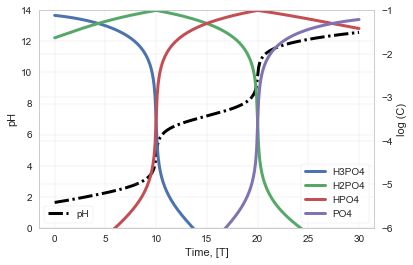

In [35]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.plot(bl.time, bl.pH['concentration'][0], 'k-.', lw=3, label='pH')
ax2.plot(bl.time, np.log10(bl.H3PO4['concentration'][0]), label='H3PO4', lw=3)
ax2.plot(bl.time, np.log10(bl.H2PO4['concentration'][0]), label='H2PO4', lw=3)
ax2.plot(bl.time, np.log10(bl.HPO4['concentration'][0]), label='HPO4', lw=3)
ax2.plot(bl.time, np.log10(bl.PO4['concentration'][0]), label='PO4', lw=3)
ax1.set_ylim(0,14)
ax2.set_ylim(-6,-1)
ax1.grid(lw=0.2)
ax2.grid(lw=0.2)
ax1.set_xlabel('Time, [T]')
ax1.set_ylabel('pH')
ax2.set_ylabel('log (C)')
ax2.legend(loc=4, frameon=1)
ax1.legend(loc=3, frameon=1)